In [52]:
import pandas as pd
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)

In [53]:
data.shape

(150902, 3)

In [54]:
data.head(10)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0
2019-11-01 05:00:00,20.0,9.0,11.0
2019-11-01 06:00:00,97.0,43.0,54.0
2019-11-01 07:00:00,299.0,120.0,179.0
2019-11-01 08:00:00,583.0,261.0,322.0


### Q1) See the summary statistics of the DataFrame by dropping nan values <font color='Blue'> (15 points) </font>

In [55]:
data.isna().sum()

Fremont Bridge Total            23
Fremont Bridge East Sidewalk    23
Fremont Bridge West Sidewalk    24
dtype: int64

In [56]:
#as the number of NAN values is about 0.04% of the total dataset, i can drop all
data.dropna()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0
...,...,...,...
2022-05-31 19:00:00,213.0,82.0,131.0
2022-05-31 20:00:00,159.0,66.0,93.0
2022-05-31 21:00:00,81.0,38.0,43.0


In [57]:
data.describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,150879.000000,150879.000000,150878.000000
mean,109.453894,49.594635,59.859655
std,139.444306,64.153706,86.599269
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,59.000000,27.000000,30.000000
75%,144.000000,67.000000,74.000000
max,1097.000000,698.000000,850.000000


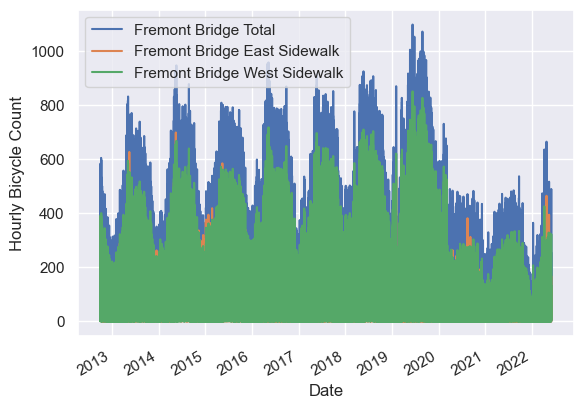

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()
data.plot()
plt.ylabel('Hourly Bicycle Count');

### Q2) Gain more insight: Resample by Month <font color='Blue'> (20 points) </font>

In [59]:
monthly_data = data.resample('M').mean()
monthly_data

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-31,94.389368,48.511494,45.877874
2012-11-30,70.343056,36.197222,34.145833
2012-12-31,48.883065,25.010753,23.872312
2013-01-31,60.327957,30.793011,29.534946
2013-02-28,74.444940,38.538690,35.906250
...,...,...,...
2022-01-31,46.123656,19.245968,26.877688
2022-02-28,57.404762,23.660714,33.744048
2022-03-31,75.874832,30.584118,45.290713


__Discussion 5:__ Consider the Figure by discussing the seasonal trends. What do you think about the decrease in 2020 ans so on? Write your discussion on the discussioon board! __(10 pnts)__

### Q3)Resample the DataFrame in days. After that, see mean 6 months (~180 days) rolling mean of the data, making sure to center the window <font color='Blue'> (20 points) </font>

In [60]:
daily_data = data.resample('D').mean()
daily_data

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03,146.708333,73.333333,73.375000
2012-10-04,144.791667,71.166667,73.625000
2012-10-05,131.166667,64.916667,66.250000
2012-10-06,83.583333,45.000000,38.583333
2012-10-07,89.250000,49.625000,39.625000
...,...,...,...
2022-05-27,103.583333,42.000000,61.583333
2022-05-28,49.250000,19.875000,29.375000
2022-05-29,30.541667,11.166667,19.375000


In [61]:
#to calculate rolling mean using window size of 180 days
rolling_data = daily_data.rolling(window = 180, center = True).mean()
rolling_data

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03,NaN,NaN,NaN
2012-10-04,NaN,NaN,NaN
2012-10-05,NaN,NaN,NaN
2012-10-06,NaN,NaN,NaN
2012-10-07,NaN,NaN,NaN
...,...,...,...
2022-05-27,NaN,NaN,NaN
2022-05-28,NaN,NaN,NaN
2022-05-29,NaN,NaN,NaN


### Q4) Use the np.where() function to distinguish weekends and weekdays. Describe a new column to the DataFrame by assigning weekends as 0 and weekdays as 1. <font color='Blue'> (20 points) </font>

_Example_
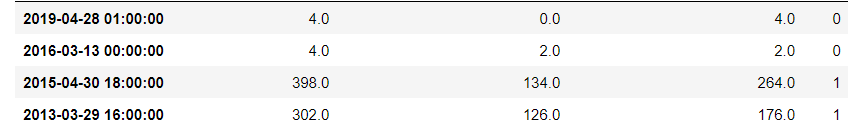

In [62]:
import numpy as np
# to identify weekends and weekdays
weekdays_weekends = np.where((data.index.dayofweek == 5) | (data.index.dayofweek == 6), 0, 1)
weekdays_weekends

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
#creating another column called weekends_weekdays in the DataFrame
data['weekends_weekdays'] = weekdays_weekends

In [64]:
data.sample(15)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,weekends_weekdays
Date,,,,
2020-12-23 13:00:00,129.0,68.0,61.0,1
2019-08-27 14:00:00,161.0,59.0,102.0,1
2013-09-08 06:00:00,19.0,14.0,5.0,0
2017-11-22 08:00:00,255.0,138.0,117.0,1
2015-04-21 00:00:00,11.0,4.0,7.0,1
2014-07-26 01:00:00,18.0,10.0,8.0,0
2013-08-01 01:00:00,9.0,2.0,7.0,1
2016-01-11 09:00:00,151.0,100.0,51.0,1
2013-10-11 01:00:00,6.0,5.0,1.0,1


### Q5) Use the np.where() function to distinguish weekends and weekdays. Describe a new column to the DataFrame by showing each index as 'weekday' or 'weekend' <font color='Blue'> (15 points) </font>

In [65]:
#to differentiate between weekdays and weekends
day_type = np.where((data.index.dayofweek == 5) | (data.index.dayofweek == 6), 'weekend', 'weekday')

In [66]:
day_type

array(['weekday', 'weekday', 'weekday', ..., 'weekday', 'weekday',
       'weekday'], dtype='<U7')

In [67]:
data['weekends_weekdays']= day_type
data.sample(10)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,weekends_weekdays
Date,,,,
2013-03-08 12:00:00,77.0,51.0,26.0,weekday
2014-03-22 21:00:00,19.0,5.0,14.0,weekend
2016-08-08 23:00:00,20.0,7.0,13.0,weekday
2016-02-12 06:00:00,76.0,50.0,26.0,weekday
2013-06-21 19:00:00,170.0,77.0,93.0,weekday
2019-11-29 11:00:00,64.0,30.0,34.0,weekday
2018-06-25 02:00:00,3.0,0.0,3.0,weekday
2017-08-18 04:00:00,5.0,1.0,4.0,weekday
2021-05-19 10:00:00,88.0,35.0,53.0,weekday


### Q6) Construct a multi-indexed data frame by indexing 'Weekend' and 'index of our DataFrame'

In [69]:
data = data.set_index(['weekends_weekdays', data.index])

In [70]:
data.sample(10)

Fremont Bridge Total  \
weekends_weekdays Date                                        
weekday           2019-06-17 07:00:00                 534.0   
                  2018-12-13 15:00:00                  92.0   
                  2016-09-07 10:00:00                  94.0   
weekend           2016-03-06 22:00:00                  10.0   
                  2020-02-22 00:00:00                  11.0   
                  2012-12-29 22:00:00                   8.0   
weekday           2016-05-26 18:00:00                 422.0   
                  2020-09-10 18:00:00                 214.0   
weekend           2014-05-17 20:00:00                  72.0   
weekday           2019-04-23 22:00:00                  26.0   

                                       Fremont Bridge East Sidewalk  \
weekends_weekdays Date                                                
weekday           2019-06-17 07:00:00                         259.0   
                  2018-12-13 15:00:00                          31.0   
                  2016-09-07 10:00:00                          48.0   
weekend           2016-03-06 22:00:00                           4.0   
                  2020-02-22 00:00:00                           4.0   
                  2012-12-29 22:00:00                           2.0   
weekday           2016-05-26 18:00:00                         141.0   
                  2020-09-10 18:00:00                          81.0   
weekend           2014-05-17 20:00:00                          45.0   
weekday           2019-04-23 22:00:00                           8.0   

                                       Fremont Bridge West Sidewalk  
weekends_weekdays Date                                               
weekday           2019-06-17 07:00:00                         275.0  
                  2018-12-13 15:00:00                          61.0  
                  2016-09-07 10:00:00                          46.0  
weekend           2016-03-06 22:00:00                           6.0  
                  2020-02-22 00:00:00                           7.0  
                  2012-12-29 22:00:00                           6.0  
weekday           2016-05-26 18:00:00                         281.0  
                  2020-09-10 18:00:00                         133.0  
weekend           2014-05-17 20:00:00                          27.0  
weekday           2019-04-23 22:00:00                          18.0